In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', 500)

In [6]:
carac = pd.read_csv("caracteristics.csv", encoding="latin-1")
holi = pd.read_csv("holidays.csv", encoding="latin-1")
places = pd.read_csv("places.csv", encoding="latin-1")
users = pd.read_csv("users.csv", encoding="latin-1")
veh = pd.read_csv("vehicles.csv", encoding="latin-1")

#### Treating features with some null values and droping useless features

In [7]:
places = places.drop(["v1", "v2", "voie", "nbv", "pr", "pr1"], axis=1)
places.env1[places.env1 == 99] = 1
places.env1[places.env1 == 3] = 0
for n in places.columns:
    places[n] = places[n].fillna(0)

In [8]:
# categories between 1 and 14
veh.catv = veh.catv.apply(lambda x: 14 if x > 14 else x)
veh = veh.drop(["senc", "occutc", "obs", "obsm", "choc", "manv"], axis=1)

In [9]:
carac.an = 2000 + carac.an
carac['date'] = pd.to_datetime([f'{row.an}-{row.mois}-{row.jour}'
                             for _, row in carac.iterrows()] )

carac.atm = carac.atm.fillna(1)
carac.col = carac.col.fillna(6)
carac.com = carac.com.fillna(55)

In [10]:
carac.drop(['adr', 'gps', 'lat', 'long'], axis=1, inplace=True)

In [11]:
users['secu'] = users['secu'].fillna(53)
users['secu1']= users['secu'].apply(lambda x: x % 10)
users['locp'] = users['locp'].fillna(0)
users['actp'] = users['actp'].fillna(0)
users['etatp'] = users['etatp'].fillna(0)
users['trajet'] = users['trajet'].fillna(3)
users['an_nais'] = users['an_nais'].fillna(1973)
users = users.drop("place", axis=1)

In [12]:
df = pd.merge(carac, users, how="outer", on="Num_Acc")
df = pd.merge(df, places, how="outer", on="Num_Acc")
df = pd.merge(df, veh, how="inner", on=["Num_Acc", 'num_veh'])
# filtering for realistic people
df = df[df.an_nais > 1918]

In [14]:
df['date'] = pd.to_datetime([f'{row.an}-{row.mois}-{row.jour}'
                             for _, row in df.iterrows()] )


In [ ]:
df["age"] = df.an - df.an_nais
df['secu2'] = df['secu'].apply(lambda x: int(x/10) if x>=10 else x)

# Grouping class 2(dead) and 3(Hospitalized) as serious
df['grav1'] = ((df.grav == 2) | (df.grav == 3)).astype(int)

In [ ]:
df.to_csv("df.csv", sep=";")

In [15]:
sns.set()

### Age Analysis

0
1


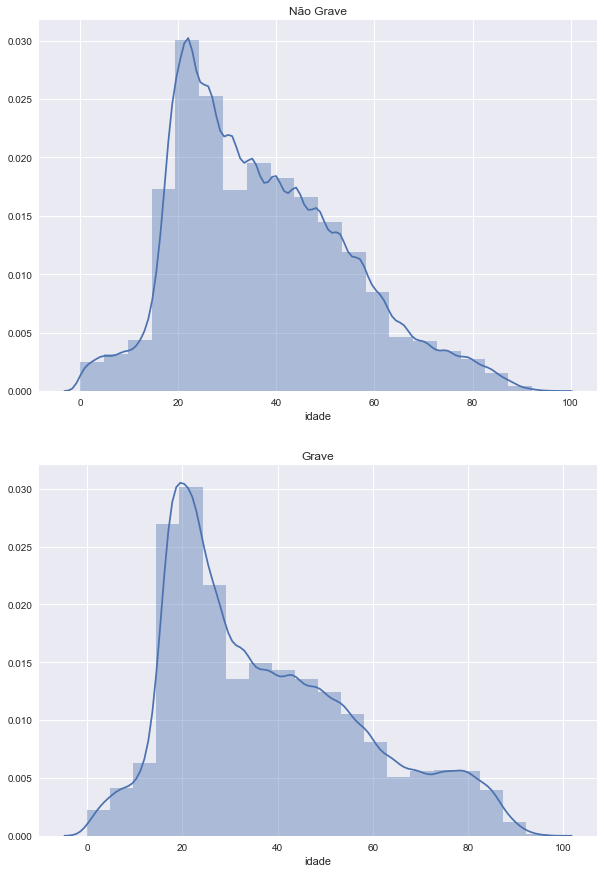

In [350]:
plt.figure(figsize=(10,15))
for i in range(2):
    print(i)
    ax = plt.subplot(2, 1, i + 1)
    sns.distplot(df[df.grav1 == i].age, bins=20)
    if i:
        plt.title("Serious")
    else:
        plt.title("Not Serious")
plt.show()

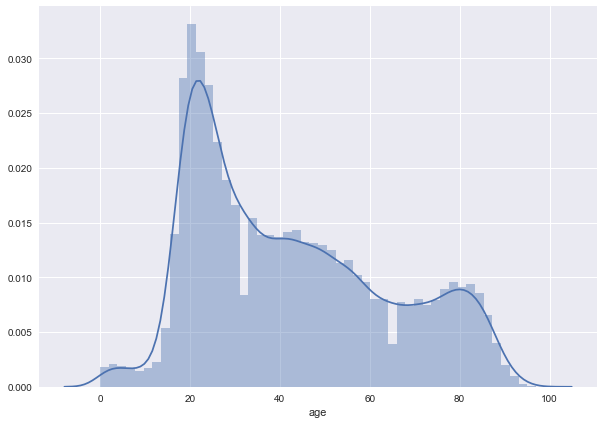

In [70]:
plt.figure(figsize=(10,7))
sns.distplot(df.age[df.grav==2])

#### Between serious (S) and not serious (NS) the distribution is almost the same, but for S we can see a higher frequency in age higher than 60's and for those had died it increases, it probably has some influence about the fragile in elder people.

## Sex analysis

In [90]:
df.sexe.count()

1873467

In [91]:
df.sexe.value_counts()/df.sexe.count()

1    0.671306
2    0.328694
Name: sexe, dtype: float64

[Text(0,0,'0%'),
 Text(0,0,'10%'),
 Text(0,0,'20%'),
 Text(0,0,'30%'),
 Text(0,0,'40%'),
 Text(0,0,'50%'),
 Text(0,0,'60%'),
 Text(0,0,'70%')]

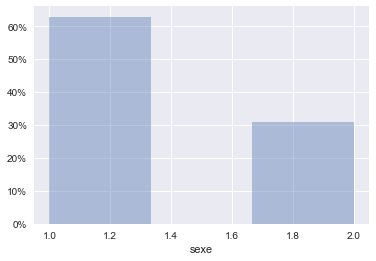

In [82]:
ax = sns.distplot(df.sexe, bins=3, kde=False)
# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(x/2000000) for x in vals])

#### 67% of  people envolved in accidents are mens

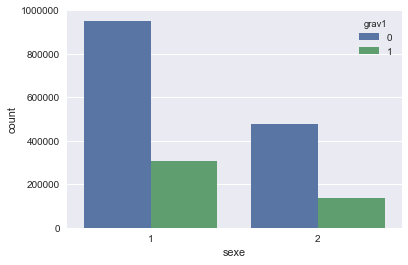

In [97]:
sns.countplot(df.sexe, hue = df.grav1)

### Accidents frequency along the year

Text(0.5,1,'Number of Accidents x Month')

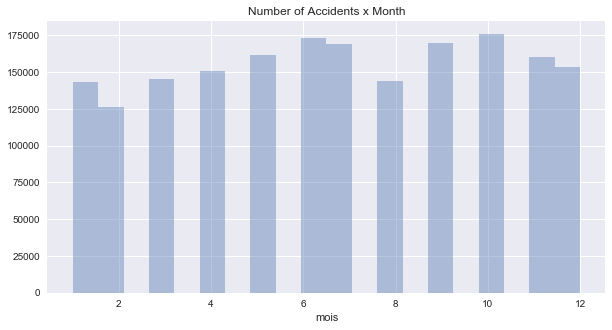

In [106]:
plt.figure(figsize=(10,5))
sns.distplot(df.mois.dropna(), bins=20, kde=False)
plt.title("Number of Accidents x Month")

Text(0.5,1,'Number of Accidents x Month')

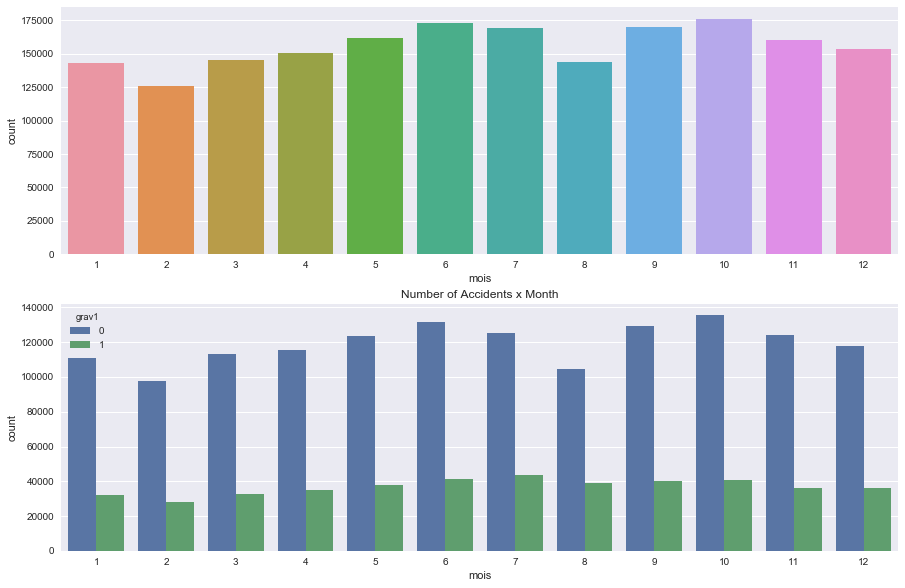

In [109]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.countplot(df.mois.dropna())
plt.subplot(2,1,2)
sns.countplot(df.mois.dropna(), hue = df.grav1)
plt.title("Number of Accidents x Month")

##### In the first graph, we can see that in middle of the and in final-beginning of the year has more ocurrence of accidents, matching with vacation period. In second graph was divided by grav category ( S and NS ), We can notice a negative correlation between S and NS in July, summer vacation period, eventhough NS decrease S increase.

## What was the condition in the accident?

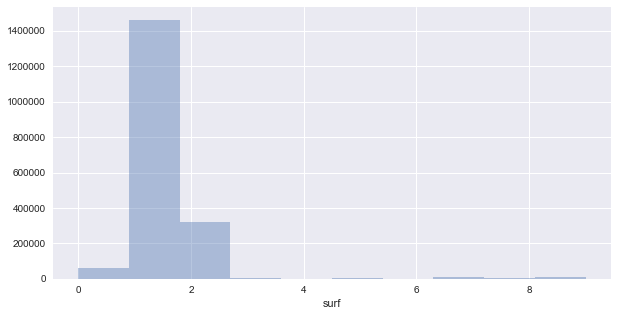

In [115]:
plt.figure(figsize=(10,5))
sns.distplot(df.surf.dropna(), bins=10, kde=False)

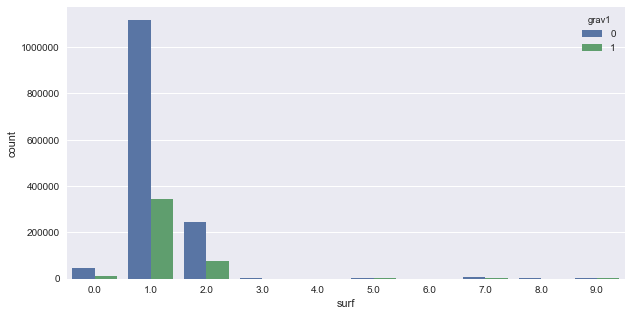

In [118]:
plt.figure(figsize=(10,5))
sns.countplot(df.surf, hue=df.grav1)

#### Great majority was in normal surface

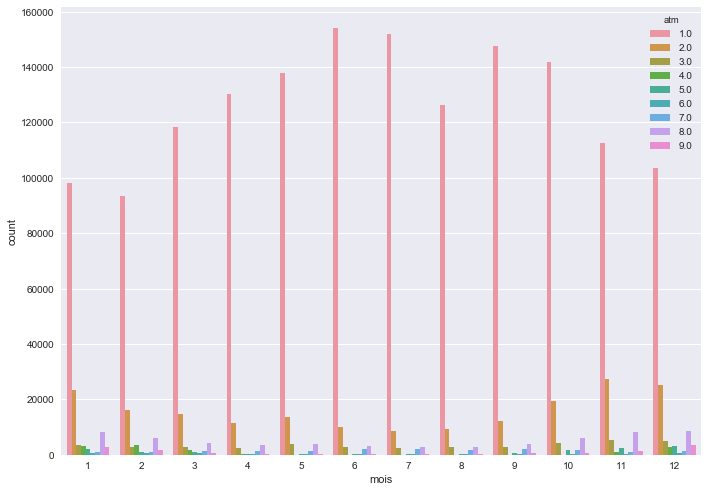

In [131]:
plt.figure(figsize=(10,7))
sns.countplot(df.mois,hue=df.atm)
plt.tight_layout()
plt.show()

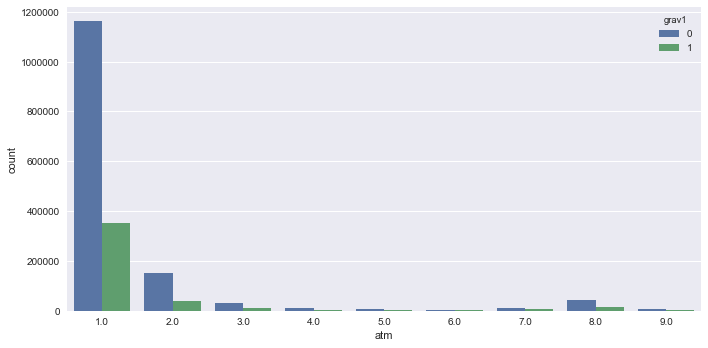

In [132]:
sns.countplot(df.atm,hue=df.grav1)
plt.tight_layout()
plt.show()

### Majority of accidents are in normal conditions of climate, but there is a variation in light rain and cloudy weather 

In [136]:
nao_grave = df[(df.grav1==0)].secu1.value_counts()/df[(df.grav1==0)].secu1.count()

In [137]:
grave = df[(df.grav1==1)].secu1.value_counts()/df[(df.grav1==1)].secu1.count()

In [138]:
grave/nao_grave

0.0    2.238224
1.0    0.887578
2.0    3.305970
3.0    1.006532
Name: secu1, dtype: float64

### Pessoas que nao usam cinto tem 3.3x mais chances de se envolverem em um acidente grave

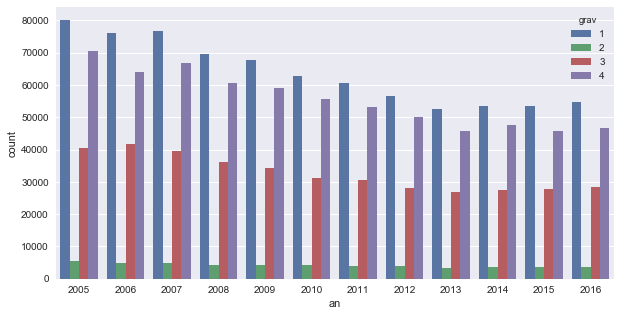

In [144]:
plt.figure(figsize=(10,5))
sns.countplot(df.an, hue=df.grav)

In [675]:
n_pessoas = df[(df.grav1 == 1) & (df.an>=2010) & (df.an<=2013)].groupby(["Num_Acc"])['Num_Acc'].count()

n_pessoas = pd.DataFrame(n_pessoas)

n_pessoas.columns = ["n"]

n_pessoas = n_pessoas.reset_index()

n_pessoas_grave = n_pessoas.groupby("n").count()

n_pessoas1 = df[(df.grav1 == 0) & (df.an>=2010) & (df.an<=2013)].groupby(["Num_Acc"])['Num_Acc'].count()

n_pessoas1 = pd.DataFrame(n_pessoas1)

n_pessoas1.columns = ["n"]

n_pessoas1 = n_pessoas1.reset_index()

n_pessoas_nao_grave = n_pessoas1.groupby("n").count()


In [676]:
p_grave=(n_pessoas_grave.sort_values(by="Num_Acc", ascending=False).head(3)/n_pessoas_grave.sum() *100)#.T.plot(kind='bar', stacked=True)
p_grave.columns = ["n"]
p_nao_grave = (n_pessoas_nao_grave.sort_values(by="Num_Acc", ascending=False).head(3)/n_pessoas_nao_grave.sum()*100)
p_nao_grave.columns = ["n"]

In [677]:
print(p_grave, p_nao_grave)

           n
n           
1  85.934707
2  10.576732
3   2.298622            n
n           
2  45.061628
1  37.001842
3  11.687546


In [669]:
n_pessoas = df[df.grav1 == 1].groupby(["Num_Acc"])['Num_Acc'].count()

n_pessoas = pd.DataFrame(n_pessoas)

n_pessoas.columns = ["n"]

n_pessoas = n_pessoas.reset_index()

n_pessoas_grave = n_pessoas.groupby("n").count()


In [670]:
p_grave=(n_pessoas_grave.sort_values(by="Num_Acc", ascending=False).head(3)/n_pessoas_grave.sum() *100)#.T.plot(kind='bar', stacked=True)
p_grave.columns = ["n"]

In [671]:
n_pessoas1 = df[df.grav1 == 0].groupby(["Num_Acc"])['Num_Acc'].count()

n_pessoas1 = pd.DataFrame(n_pessoas1)

n_pessoas1.columns = ["n"]

n_pessoas1 = n_pessoas1.reset_index()

n_pessoas_nao_grave = n_pessoas1.groupby("n").count()

In [680]:
p_nao_grave = (n_pessoas_nao_grave.sort_values(by="Num_Acc", ascending=False).head(3)/n_pessoas_nao_grave.sum()*100)
p_nao_grave.columns = ["n"]

In [679]:
print(p_grave, p_nao_grave)

           n
n           
1  85.934707
2  10.576732
3   2.298622                n
n               
2  276962.162162
1  227424.324324
3   71835.135135


<Figure size 1440x1080 with 0 Axes>

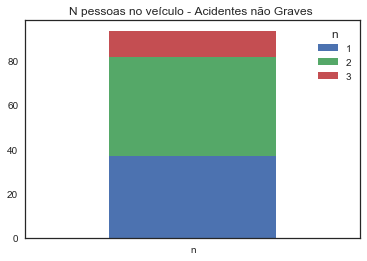

In [615]:
plt.figure(figsize=(20,15))
p_nao_grave.sort_index().T.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.title("N pessoas no veículo - Acidentes não Graves ")
plt.savefig("N pessoas no veículo - Acidentes não Graves.jpg")



<Figure size 1440x720 with 0 Axes>

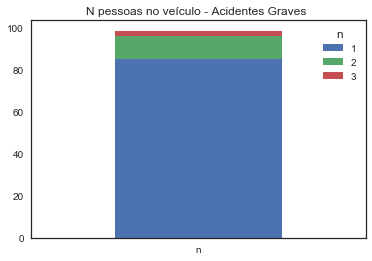

In [616]:
plt.figure(figsize=(20,10))
p_grave.T.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.title("N pessoas no veículo - Acidentes Graves ")
plt.savefig("N pessoas no veículo - Acidentes Graves.jpg")

In [461]:
x_col= ['secu1','secu','col','catr','agg','plan','catu','situ','dep','atm','grav1','grav']

<Figure size 2880x2160 with 0 Axes>

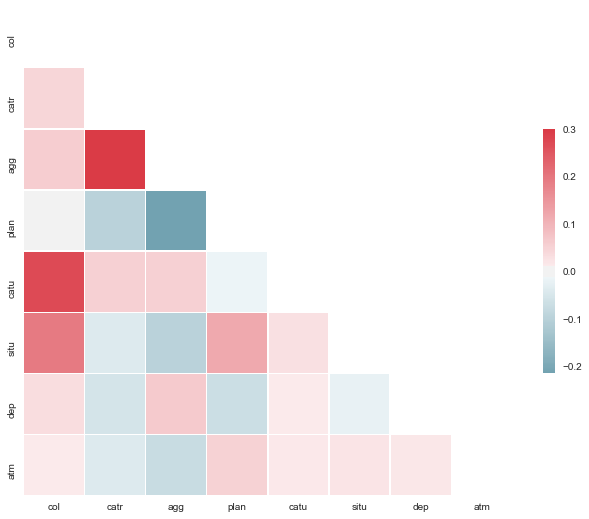

In [617]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,30))


sns.set(style="white")

# Compute the correlation matrix
corr = df[x_col].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("heatmap.jpg")

In [536]:
dep = pd.read_csv("departement.csv")

In [537]:
df["dep2"] = df.dep/10

In [538]:
dep.head()

,1,01,Ain,AIN,ain,A500
0,2,02,Aisne,AISNE,aisne,A250
1,3,03,Allier,ALLIER,allier,A460
2,5,05,Hautes-Alpes,HAUTES-ALPES,hautes-alpes,H32412
3,4,04,Alpes-de-Haute-Provence,ALPES-DE-HAUTE-PROVENCE,alpes-de-haute-provence,A412316152
4,6,06,Alpes-Maritimes,ALPES-MARITIMES,alpes-maritimes,A41256352


In [539]:
dep.columns = ['1', 'dep2', 'Ain', 'AIN', 'ain', 'A500']
dep = dep[['dep2', 'Ain', 'AIN', 'ain', 'A500']]

In [541]:
dep = dep[dep.dep2 != "2a"]

In [543]:
dep.dep2 = dep.dep2.astype(int)

In [545]:
df = pd.merge(df, dep, how="outer" , on="dep2")

In [588]:
df.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'dep', 'date', 'catu', 'grav', 'sexe', 'trajet', 'secu',
       'locp', 'actp', 'etatp', 'an_nais', 'num_veh', 'secu1', 'catr', 'circ',
       'vosp', 'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ',
       'env1', 'catv', 'idade', 'secu2', 'grav1', 'dep2', 'Ain', 'AIN', 'ain',
       'A500'],
      dtype='object')

In [552]:
df.Num_Acc.nunique()

839821

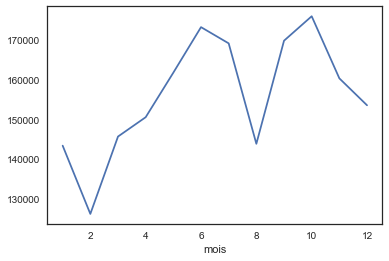

In [594]:
df.groupby('mois').count()['an'].plot()

In [579]:
df_date = df.set_index('date')
temp = df_date.groupby(pd.Grouper(freq='M')).count()

In [580]:
temp.

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,dep,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,secu1,catr,circ,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,catv,idade,secu2,grav1,dep2,Ain,AIN,ain,A500
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-31,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,16351,15595,15595,15595,15595
2005-02-28,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12737,12136,12136,12136,12136
2005-03-31,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,14730,13966,13966,13966,13966
2005-04-30,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850,14138,14138,14138,14138
2005-05-31,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,17731,16835,16835,16835,16835
2005-06-30,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,18775,17996,17996,17996,17996
2005-07-31,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,17667,16935,16935,16935,16935
2005-08-31,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,14310,14310,14310,14310
2005-09-30,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,17724,16995,16995,16995,16995


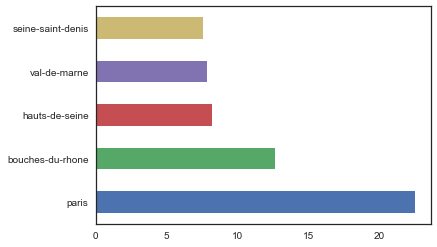

In [619]:
n=0
(df[df.grav1 == n].ain.value_counts().head(5)/df[df.grav1 == n].Num_Acc.nunique() *100).plot(kind="barh")

## 

In [691]:
n=0
df[df['agg']==n].grav1.value_counts()/df[df['agg']==n].grav1.count()*100

Series([], Name: grav1, dtype: float64)

In [693]:
n=1
df[df.grav1 == n]['agg'].value_counts()/df[df.grav1 == n]['agg'].count() *100

1.0    50.209756
2.0    49.790244
Name: agg, dtype: float64

In [ ]:
n=1
df[df.grav1 == n]['agg'].value_counts()/df[df.grav1 == n]['agg'].count() *100

In [686]:
n = 1
grave = (df[df.grav1 == n].plan.value_counts()/df.plan.value_counts()*100)

n = 0
n_grave = (df[df.grav1 == n].plan.value_counts()/df.plan.value_counts()*100)
 
grave/n_grave

0.0    0.266817
1.0    0.271116
2.0    0.549593
3.0    0.566480
4.0    0.616744
Name: plan, dtype: float64

In [687]:
grave

1.0    21.328953
2.0    35.466909
3.0    36.162616
0.0    21.061992
4.0    38.147279
Name: plan, dtype: float64

In [682]:
grave

1.0    16.507363
2.0     2.671357
3.0     2.600473
0.0     1.396929
4.0     0.476977
Name: plan, dtype: float64

In [647]:
n_grave

1.0    79.750184
0.0     6.857559
2.0     6.366485
3.0     6.012791
4.0     1.012980
Name: plan, dtype: float64

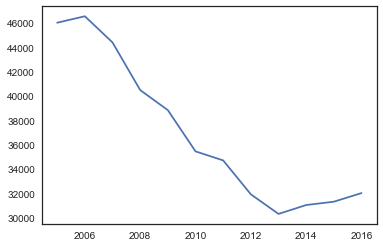

In [662]:
df[df.grav1==1].an.value_counts().sort_index().plot()

In [ ]:
df.Num_Acc

In [664]:
df[df.an == 2016].Num_Acc.nunique()

59430

x_col= ['col','catr','agg','plan','catu','situ','dep','atm']
df_dummies = pd.DataFrame()
for coluna in x_col:
    temp = pd.get_dummies(df[coluna], prefix=coluna)
    df_dummies = pd.concat([df_dummies, temp], axis=1)

df_dummies.head()